## Fashion MNIST

## Imports

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as tf_layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets.fashion_mnist import load_data as load_data_Fashion_MNIST

import numpynet
import numpynet.layers
import numpynet.activations
import numpynet.losses
import numpynet.network
import numpynet.callbacks
import demo_utils

## Loading data

In [3]:
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = load_data_Fashion_MNIST()

fmnist = {
    'train': {
        'x': x_train_fmnist[..., np.newaxis] / 255.0 - 0.5,
        'y': y_train_fmnist,
        'y_hot': np.array(tf.one_hot(y_train_fmnist, 10))
    },
    'test': {
        'x': x_test_fmnist[..., np.newaxis] / 255.0 - 0.5,
        'y': y_test_fmnist,
        'y_hot': np.array(tf.one_hot(y_test_fmnist, 10))
    }
}

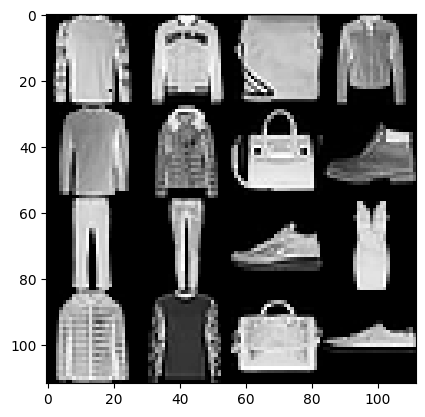

In [4]:
demo_utils.plot_random_images(fmnist['train']['x'])

## Tensorflow

### Creating and fitting

In [14]:
tf_model_fmnist = keras.models.Sequential([
    tf_layers.InputLayer((28, 28, 1)),
    tf_layers.Conv2D(32, 3, padding='same', strides=(2, 2), activation='relu'),
    tf_layers.Dropout(0.1),
    tf_layers.Conv2D(64, 3, padding='same', strides=(2, 2), activation='relu'),
    tf_layers.Dropout(0.1),
    tf_layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf_layers.Flatten(),
    tf_layers.Dense(128, activation='relu'),
    tf_layers.Dropout(0.5),
    tf_layers.Dense(10 , activation = 'softmax')
])

In [19]:
tf_model_fmnist.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 dropout_27 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 dropout_28 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 flatten_10 (Flatten)        (None, 6272)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

In [12]:
tf_model_fmnist.compile(optimizer=SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'],
)

In [ ]:
last_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('saved_models/tf_fmnist_last')
best_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('saved_models/tf_fmnist_best', save_best_only=True)

tf_fmnist_history = tf_model_fmnist.fit(
    fmnist['train']['x'],
    fmnist['train']['y_hot'],
    validation_data=(fmnist['test']['x'], fmnist['test']['y_hot']),
    epochs=10,
    batch_size=1,
    callbacks=[last_checkpoint_callback, best_checkpoint_callback]
)

### Results

313/313 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.80      0.84      0.82      1000
           3       0.88      0.92      0.90      1000
           4       0.78      0.86      0.82      1000
           5       0.99      0.96      0.98      1000
           6       0.77      0.62      0.69      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



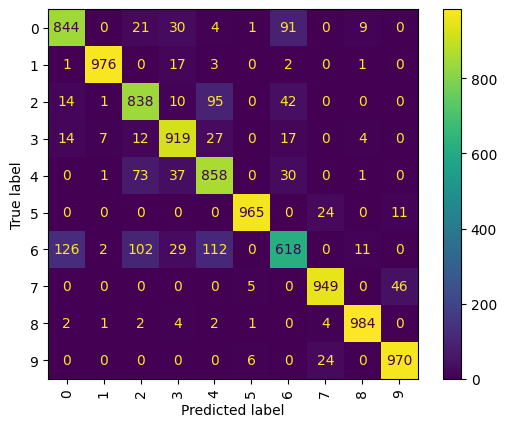

In [20]:
demo_utils.show_final_results(tf_model_fmnist, fmnist['test'])

## Own library

### Creating and fitting

In [8]:
layers = [
    numpynet.layers.InputLayer((28, 28, 1)),
    
    numpynet.layers.Padding2DLayer(((0, 1), (0, 1)), mode='same'),
    numpynet.layers.Conv2DLayer(32, kernel_size=3, stride=2),
    numpynet.layers.ActivationLayer('relu'),
    
    numpynet.layers.DropoutLayer(0.1),
    numpynet.layers.Padding2DLayer(((0, 1), (0, 1)), mode='same'),
    numpynet.layers.Conv2DLayer(64, kernel_size=3, stride=2),
    numpynet.layers.ActivationLayer('relu'),
    
    numpynet.layers.DropoutLayer(0.1),
    numpynet.layers.Padding2DLayer(1, mode='same'),
    numpynet.layers.Conv2DLayer(128, kernel_size=3, stride=1),
    numpynet.layers.ActivationLayer('relu'),
    
    numpynet.layers.FlattenLayer(),
    
    numpynet.layers.DenseLayer(128),
    numpynet.layers.BiasLayer(),
    numpynet.layers.ActivationLayer('relu'),
    
    numpynet.layers.DropoutLayer(0.5),
    numpynet.layers.DenseLayer(10),
    numpynet.layers.BiasLayer(),
    numpynet.layers.SoftmaxLayer(),
]

own_model_fmnist = numpynet.network.Sequential(layers)

In [9]:
own_model_fmnist.compile(
    loss='cce',
    metrics=['categorical_accuracy']
)

In [10]:
own_model_fmnist.summary()

NO   | NAME                 | PARAMS     | INPUT           | OUTPUT         
0    | InputLayer           | 0          | (28, 28, 1)     | (28, 28, 1)    
1    | Padding2DLayer       | 0          | (28, 28, 1)     | (29, 29, 1)    
2    | Conv2DLayer          | 320        | (29, 29, 1)     | (14, 14, 32)   
3    | ActivationLayer      | 0          | (14, 14, 32)    | (14, 14, 32)   
4    | DropoutLayer         | 0          | (14, 14, 32)    | (14, 14, 32)   
5    | Padding2DLayer       | 0          | (14, 14, 32)    | (15, 15, 32)   
6    | Conv2DLayer          | 18496      | (15, 15, 32)    | (7, 7, 64)     
7    | ActivationLayer      | 0          | (7, 7, 64)      | (7, 7, 64)     
8    | DropoutLayer         | 0          | (7, 7, 64)      | (7, 7, 64)     
9    | Padding2DLayer       | 0          | (7, 7, 64)      | (9, 9, 64)     
10   | Conv2DLayer          | 73856      | (9, 9, 64)      | (7, 7, 128)    
11   | ActivationLayer      | 0          | (7, 7, 128)     | (7, 7, 128)    

In [ ]:
last_checkpoint_callback = numpynet.callbacks.ModelCheckpoint('saved_models/own_fmnist_last.dat', verbose=True)
best_checkpoint_callback = numpynet.callbacks.ModelCheckpoint('saved_models/own_fmnist_best.dat', save_best_only=True, monitor='val_loss', mode='min', verbose=True)
stopping_callback = numpynet.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

own_fmnist_history = own_model_fmnist.fit(
    fmnist['train']['x'],
    fmnist['train']['y_hot'],
    validation_data=(fmnist['test']['x'], fmnist['test']['y_hot']),
    learning_rate=0.001,
    epochs=10,
    callbacks=[last_checkpoint_callback, best_checkpoint_callback, stopping_callback],
)

### Results

Predict: 100%|██████████| 10000/10000 [00:10<00:00, 964.90it/s]


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.84      0.82      1000
           3       0.92      0.89      0.90      1000
           4       0.81      0.81      0.81      1000
           5       0.98      0.98      0.98      1000
           6       0.71      0.70      0.71      1000
           7       0.96      0.93      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



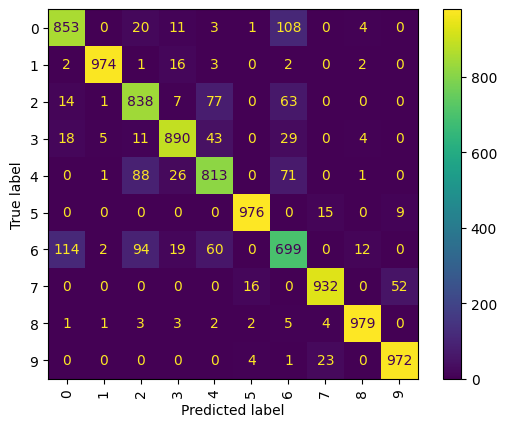

In [25]:
demo_utils.show_final_results(own_model_fmnist, fmnist['test'])

## History Comparison

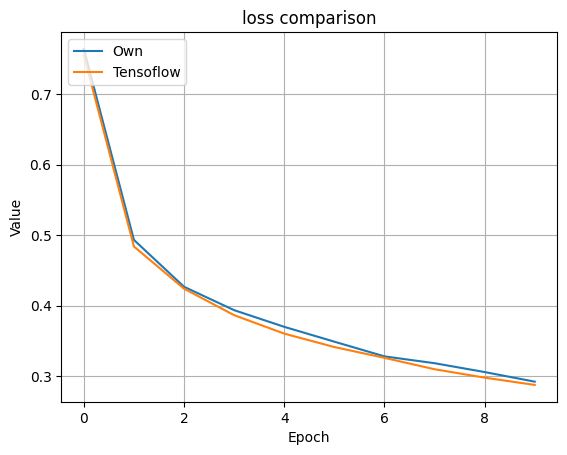

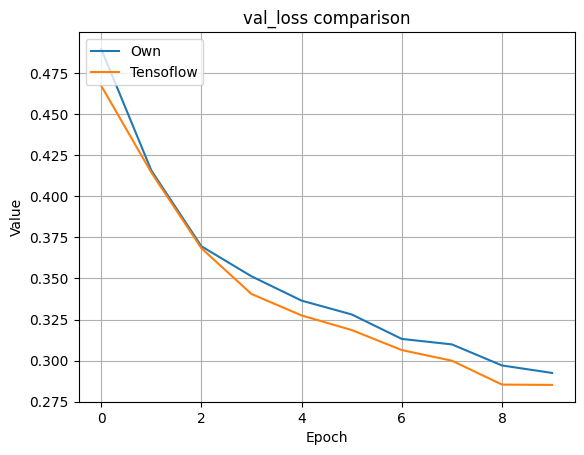

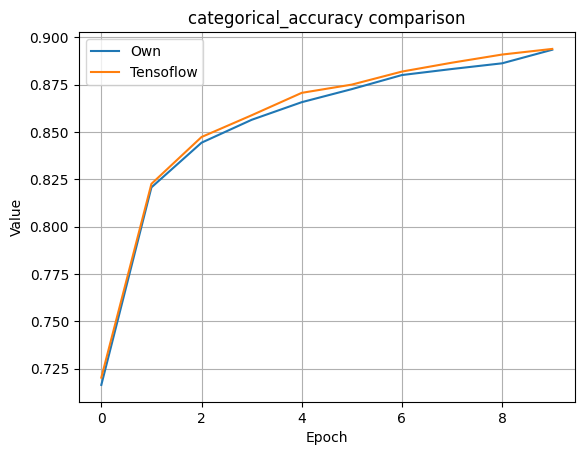

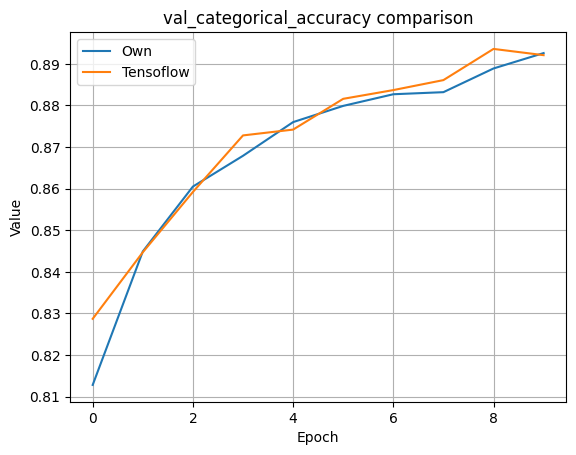

In [125]:

demo_utils.plot_history_comparison(own_fmnist_history, tf_fmnist_history.history)